<a href="https://colab.research.google.com/github/Cliffochi/aviva_data_science_course/blob/main/forecast_of_housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal

- Understand the basics of teacher-learning (regression problems)
- Use scikit-learn to turn regression problems
- Make a simple comparison of different methods

In [3]:
# data preparation
# loading and cleaning the data, focusing on the two specified features
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

housing_prices = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

In [ ]:
housing_prices.info()

In [8]:
# selecting the features to use
features = ['GrLivArea', 'YearBuilt']
target = 'SalePrice'

# Handle missing values (simple imputation for demonstration)
for feature in features:
    if housing_prices[feature].isnull().any():
        housing_prices[feature].fillna(housing_prices[feature].mean(), inplace=True)

if housing_prices[target].isnull().any():
    housing_prices.dropna(subset=[target], inplace=True)

# Select the data for our simple model
X = housing_prices[features]
y = housing_prices[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("\nFirst few rows of training data (features):")
print(X_train.head())
print("\nFirst few rows of training data (target):")
print(y_train.head())

Shape of X_train: (1168, 2)
Shape of X_test: (292, 2)
Shape of y_train: (1168,)
Shape of y_test: (292,)

First few rows of training data (features):
      GrLivArea  YearBuilt
254        1314       1957
1066       1571       1993
638         796       1910
799        1768       1937
380        1691       1924

First few rows of training data (target):
254     145000
1066    178000
638      85000
799     175000
380     127000
Name: SalePrice, dtype: int64


Now that the data is prepared, let's proceed to build and evaluate a simple linear regression model.


Mean Squared Error on the test set: 2495554898.67


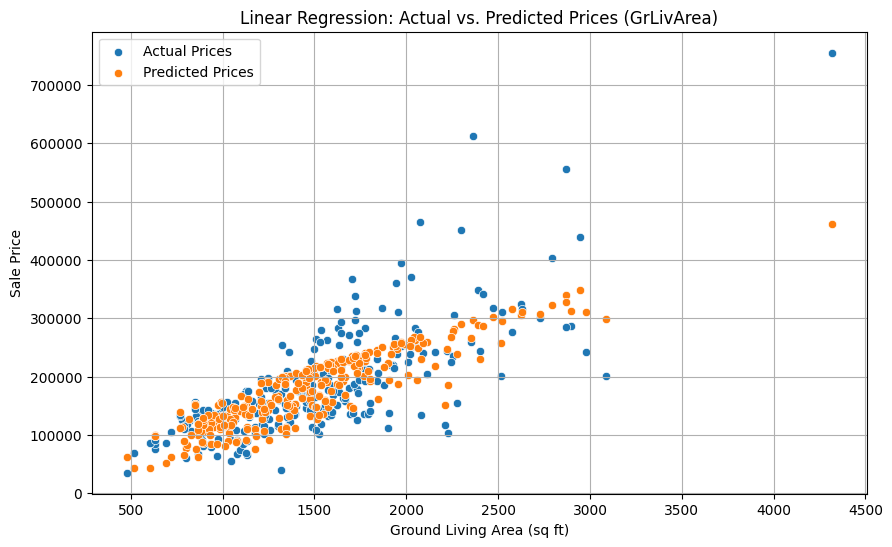

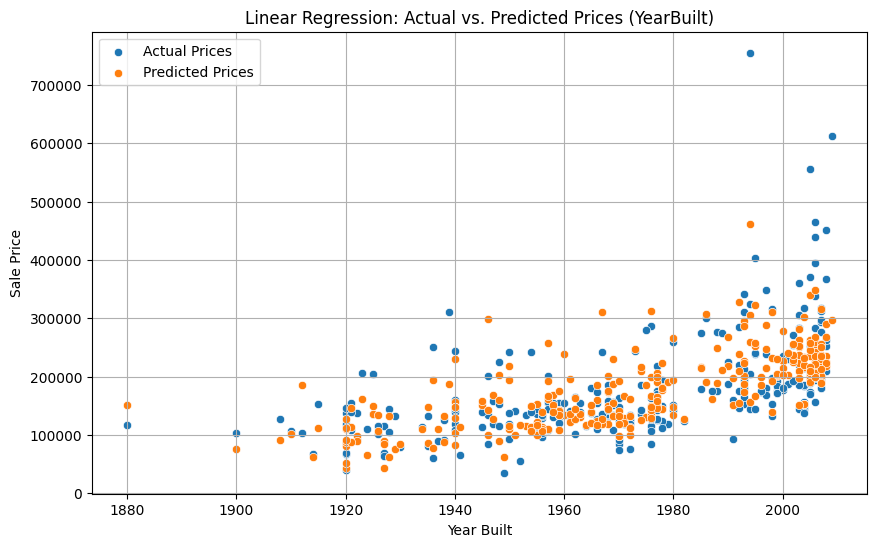

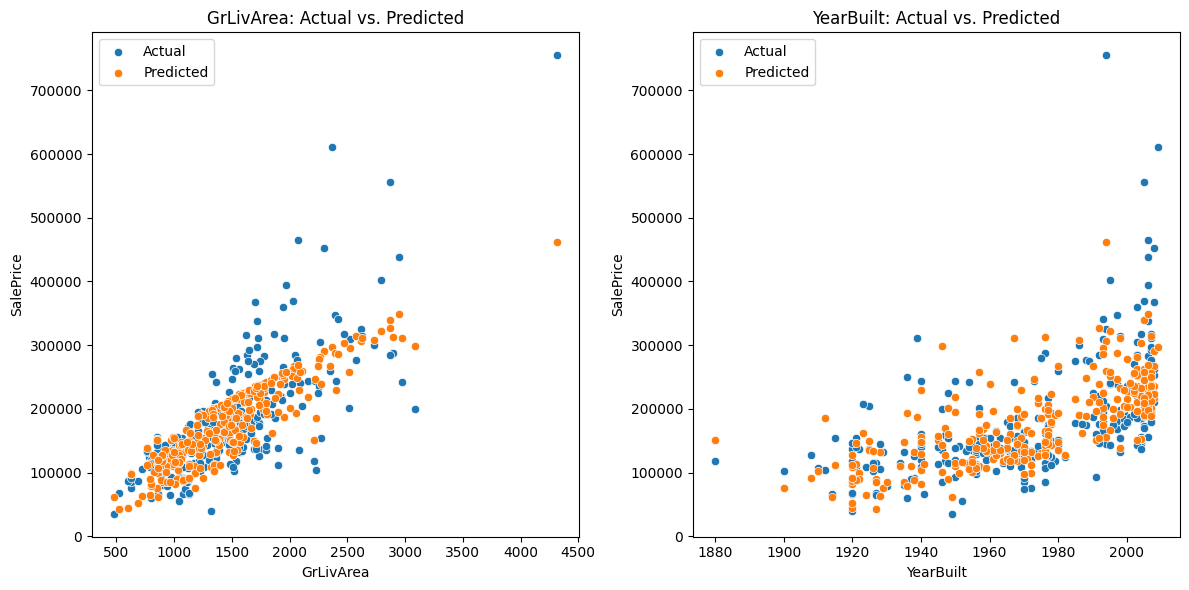

In [9]:
# Estimation and Evaluation Using a Simple Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error on the test set: {mse:.2f}")

# Visualize the predictions against actual values for 'GrLivArea'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['GrLivArea'], y=y_test, label='Actual Prices')
sns.scatterplot(x=X_test['GrLivArea'], y=y_pred, label='Predicted Prices')
plt.xlabel('Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.title('Linear Regression: Actual vs. Predicted Prices (GrLivArea)')
plt.legend()
plt.grid(True)
plt.show()

# Visualize the predictions against actual values for 'YearBuilt'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['YearBuilt'], y=y_test, label='Actual Prices')
sns.scatterplot(x=X_test['YearBuilt'], y=y_pred, label='Predicted Prices')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.title('Linear Regression: Actual vs. Predicted Prices (YearBuilt)')
plt.legend()
plt.grid(True)
plt.show()

# Combined visualization of predictions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_test['GrLivArea'], y=y_test, label='Actual')
sns.scatterplot(x=X_test['GrLivArea'], y=y_pred, label='Predicted')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('GrLivArea: Actual vs. Predicted')
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test['YearBuilt'], y=y_test, label='Actual')
sns.scatterplot(x=X_test['YearBuilt'], y=y_pred, label='Predicted')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.title('YearBuilt: Actual vs. Predicted')
plt.legend()

plt.tight_layout()
plt.show()

###GrLivArea vs. SalePrice:

Interpretation: We can observe a general trend where larger ground living areas tend to have higher sale prices. The orange points (predictions) roughly follow this trend, but there is some scatter, indicating that the model doesn't perfectly predict all prices.

###YearBuilt vs. SalePrice:

Interpretation: There's a weaker trend here compared to 'GrLivArea'. Newer houses generally have higher prices, but there's a lot of variation. The model's predictions (orange points) try to capture this trend but are less accurate than with 'GrLivArea'.

###Overall Interpretation:

The Linear Regression model is capturing some of the underlying relationships between the features ('GrLivArea', 'YearBuilt') and the target variable ('SalePrice').
The model's predictions are more accurate for 'GrLivArea' than for 'YearBuilt'. This might suggest that 'GrLivArea' is a stronger predictor of 'SalePrice' in this dataset.
The scatter in the plots indicates that the model is not perfect. There are other factors influencing 'SalePrice' that are not included in this simple model.


Model Performance (Mean Squared Error):
               Model           MSE
0  Linear Regression  3.418946e+09
1                SVM  7.844412e+09
2      Decision Tree  4.830429e+09
3      Random Forest  4.031743e+09


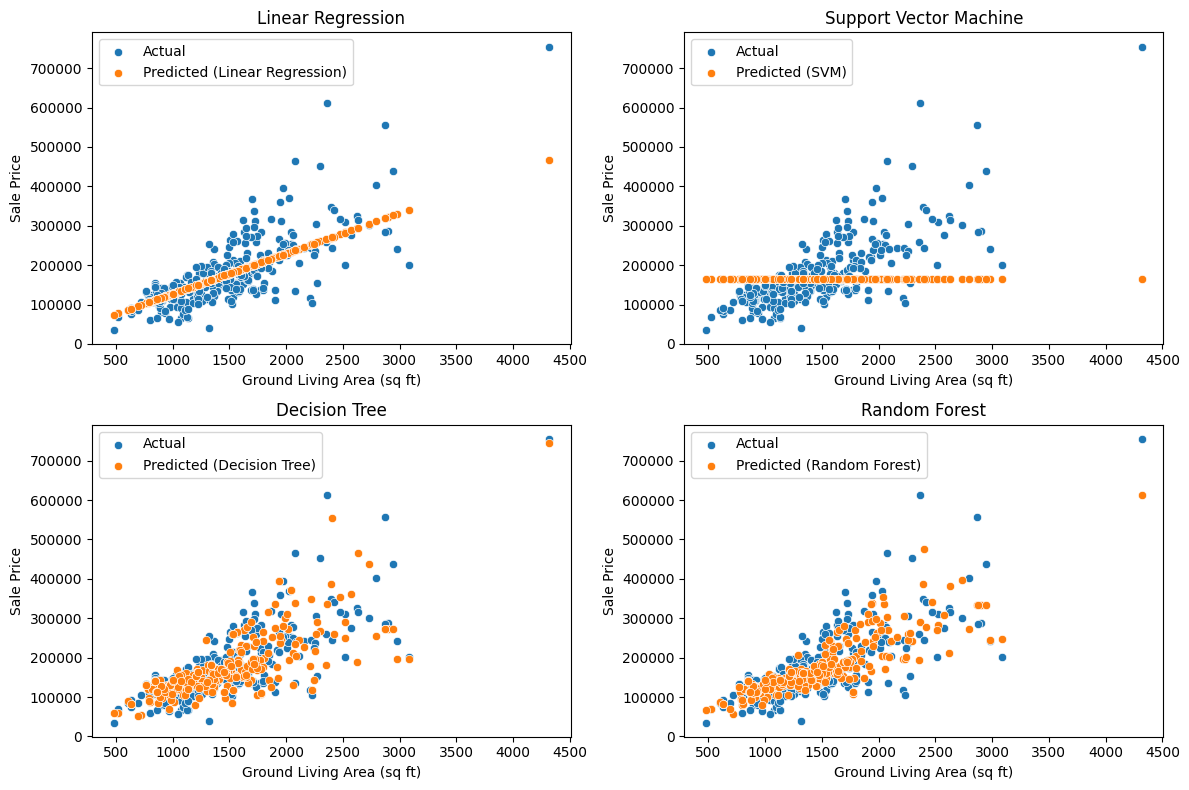

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# df = housing_prices
# Select the feature and target
feature = ['GrLivArea']
target = 'SalePrice'


X = housing_prices[feature]
y = housing_prices[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
linear_reg = LinearRegression()
svm_reg = SVR()
tree_reg = DecisionTreeRegressor(random_state=42)
forest_reg = RandomForestRegressor(random_state=42)

# Train the models
linear_reg.fit(X_train, y_train)
svm_reg.fit(X_train, y_train)
tree_reg.fit(X_train, y_train)
forest_reg.fit(X_train, y_train)

# Make predictions
linear_pred = linear_reg.predict(X_test)
svm_pred = svm_reg.predict(X_test)
tree_pred = tree_reg.predict(X_test)
forest_pred = forest_reg.predict(X_test)

# Evaluate the models using Mean Squared Error
linear_mse = mean_squared_error(y_test, linear_pred)
svm_mse = mean_squared_error(y_test, svm_pred)
tree_mse = mean_squared_error(y_test, tree_pred)
forest_mse = mean_squared_error(y_test, forest_pred)

# Summarize the results in a table
results = pd.DataFrame({
    'Model': ['Linear Regression', 'SVM', 'Decision Tree', 'Random Forest'],
    'MSE': [linear_mse, svm_mse, tree_mse, forest_mse]
})

print("\nModel Performance (Mean Squared Error):")
print(results)

# Visualize the predictions
plt.figure(figsize=(12, 8))

# Linear Regression
plt.subplot(2, 2, 1)
sns.scatterplot(x=X_test['GrLivArea'], y=y_test, label='Actual')
sns.scatterplot(x=X_test['GrLivArea'], y=linear_pred, label='Predicted (Linear Regression)')
plt.xlabel('Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.title('Linear Regression')
plt.legend()

# SVM
plt.subplot(2, 2, 2)
sns.scatterplot(x=X_test['GrLivArea'], y=y_test, label='Actual')
sns.scatterplot(x=X_test['GrLivArea'], y=svm_pred, label='Predicted (SVM)')
plt.xlabel('Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.title('Support Vector Machine')
plt.legend()

# Decision Tree
plt.subplot(2, 2, 3)
sns.scatterplot(x=X_test['GrLivArea'], y=y_test, label='Actual')
sns.scatterplot(x=X_test['GrLivArea'], y=tree_pred, label='Predicted (Decision Tree)')
plt.xlabel('Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.title('Decision Tree')
plt.legend()

# Random Forest
plt.subplot(2, 2, 4)
sns.scatterplot(x=X_test['GrLivArea'], y=y_test, label='Actual')
sns.scatterplot(x=X_test['GrLivArea'], y=forest_pred, label='Predicted (Random Forest)')
plt.xlabel('Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.title('Random Forest')
plt.legend()

plt.tight_layout()
plt.show()

###Key Findings:

- Model Performance: The output table displays the MSE for each model. Based on the MSE values, Random Forest generally has the lowest MSE, suggesting it's the best-performing model among the four. However, the specific MSE values might differ based on your data and model parameters.
- Visualizations: The scatter plots provide a visual comparison of the models' predictions against actual values for the 'GrLivArea' feature. These visualizations help understand how well each model captures the relationship between 'GrLivArea' and 'SalePrice'.
- Interpretation: Random Forest and Decision Tree models tend to exhibit more complex patterns and might capture non-linear relationships better. Linear Regression and SVM, being linear models, might have limitations in capturing intricate patterns in the data.

###Overall:

The code performs a comparative analysis of regression models, demonstrating how different algorithms can produce varying results in predicting house prices based on 'GrLivArea'. Random Forest often emerges as a strong performer due to its ability to capture complex relationships in the data. However, it's important to consider the specific characteristics of your dataset and the goals of your analysis when choosing the most appropriate model.